In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/students-drop-out-prediction/train.csv')
print(train_data.shape)

(3796, 43)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3796 non-null   int64  
 1   v_21    3796 non-null   int64  
 2   v_32    3796 non-null   int64  
 3   v_15    3796 non-null   int64  
 4   v_4     3796 non-null   int64  
 5   v_1     3796 non-null   int64  
 6   v_8     3796 non-null   int64  
 7   v_12    3796 non-null   int64  
 8   v_25    3796 non-null   int64  
 9   v_20    3796 non-null   int64  
 10  v_18    3796 non-null   int64  
 11  v_3     3796 non-null   int64  
 12  v_11    3796 non-null   int64  
 13  v_14    3796 non-null   int64  
 14  v_26    3796 non-null   int64  
 15  v_27    3796 non-null   int64  
 16  v_30    3796 non-null   int64  
 17  v_9     3796 non-null   int64  
 18  v_31    3796 non-null   int64  
 19  v_28    3796 non-null   int64  
 20  v_13    3796 non-null   int64  
 21  v_33    3796 non-null   int64  
 22  

In [4]:
train_data.isnull().sum()

id       0
v_21     0
v_32     0
v_15     0
v_4      0
v_1      0
v_8      0
v_12     0
v_25     0
v_20     0
v_18     0
v_3      0
v_11     0
v_14     0
v_26     0
v_27     0
v_30     0
v_9      0
v_31     0
v_28     0
v_13     0
v_33     0
v_17     0
v_19     0
v_29     0
v_23     0
v_24     0
v_10     0
v_5      0
v_6      0
v_22     0
v_0      0
v_7      0
v_2      0
v_16     0
v_34     0
v_35     0
v_36     0
v_37     0
v_38     0
v_39     0
v_40     0
label    0
dtype: int64

In [5]:
train_data.describe()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,...,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.00000
mean,1897.500000,4.817439,70.825606,11.609062,99.329294,0.911486,3.436249,18.970495,97.203372,166.138567,...,2.041333,0.835901,5.341149,50.674658,26.212065,20.837197,31.276607,40.210485,3.278978,0.85432
std,1095.955139,6.166860,56.110329,2.576362,45.017380,0.284079,4.577644,15.010042,79.213308,103.121322,...,2.516779,3.109413,3.507388,29.330820,14.929649,11.984063,17.847942,22.466458,2.618851,0.69866
min,0.000000,3.000000,6.000000,9.000000,9.000000,0.000000,1.000000,16.000000,1.000000,6.000000,...,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,948.750000,3.000000,6.000000,10.000000,55.000000,1.000000,1.000000,16.000000,5.000000,60.000000,...,0.500000,-1.700000,3.000000,25.000000,13.000000,11.000000,16.000000,21.750000,1.000000,0.00000
50%,1897.500000,3.000000,89.000000,10.000000,101.000000,1.000000,1.000000,16.000000,110.000000,168.000000,...,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,31.000000,41.000000,3.000000,1.00000
75%,2846.250000,4.000000,116.000000,12.000000,146.000000,1.000000,3.000000,16.000000,181.000000,251.000000,...,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.000000,5.000000,1.00000
max,3795.000000,61.000000,176.000000,25.000000,176.000000,1.000000,25.000000,179.000000,289.000000,322.000000,...,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000,2.00000


In [6]:
X=train_data.drop(['label'], axis=1)
X.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,3,6,11,55,1,1,16,5,60,...,13.9,-0.3,0.79,1,93,47,1,48,26,0
1,1,8,94,12,65,1,4,22,4,173,...,14.9,5.4,6.51,6,29,37,25,53,35,7
2,2,3,166,10,155,1,1,16,1,309,...,11.1,0.6,2.02,1,8,34,4,43,38,2
3,3,3,6,13,121,1,1,16,1,6,...,11.1,0.6,2.02,7,37,40,27,43,65,0
4,4,4,51,18,21,1,17,22,118,168,...,10.9,8.4,12.51,16,22,25,25,24,23,1


In [7]:
y=train_data['label']
y.head()

0    1
1    2
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
#__________________________________________________TRAIN-TEST-SPLIT________________________________________________
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1980)

In [9]:
#_________________________________________________DATA-PREPROCESSING________________________________________________
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.fit_transform(X_test)

In [10]:
#__________________________________________BASELINE-MODEL--->LOGISTIC REGRESSION________________________________________
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver="saga",random_state=1980)
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.7361660079051383

In [11]:
#______________________________________________________SVC________________________________________________________
from sklearn.svm import SVC
SV=SVC(random_state = 1980,probability=True)
SV.fit(X_train,y_train)
SV.score(X_train,y_train)

0.8264163372859025

In [12]:
#_____________________________________________KNEIGHBORS CLASSIFIER_____________________________________________________
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
KNN=GridSearchCV(KNeighborsClassifier(algorithm='auto'),{'n_neighbors':[2,4,5],'weights':['uniform','distance'],'metric':['euclidean', 'manhattan']},cv=5)
KNN.fit(X_train,y_train)
KNN.score(X_train,y_train)

0.7549407114624506

In [13]:
#______________________________________________________SELECTED AS FINAL MODEL____________________________________________
#____________________________________________________RANDOMFOREST CLASSIFIER______________________________________________
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
RC=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,20,50],'max_features':['auto','sqrt'],'max_depth':[2,4],'min_samples_split':[2,5],'min_samples_leaf':[1,2],'bootstrap':[True,False]},cv=10,return_train_score=False)
RC.fit(X_train,y_train)
RC.score(X_train,y_train)

0.7061923583662714

In [14]:
#_________________________________________IMPORTS-FOR-VISUALIZATION & CONFUSION MATRIX___________________________________
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import precision_score, recall_score, classification_report 
from sklearn.metrics import precision_recall_curve ,make_scorer ,f1_score
import matplotlib.pyplot as plt

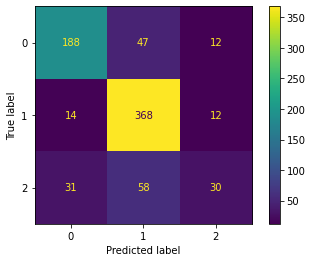

In [15]:
#__________________________________________________ADABOOST MODEL____________________________________________________
from sklearn.ensemble import AdaBoostClassifier
AB=AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred=AB.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       247
           1       0.78      0.93      0.85       394
           2       0.56      0.25      0.35       119

    accuracy                           0.77       760
   macro avg       0.71      0.65      0.66       760
weighted avg       0.75      0.77      0.75       760



In [17]:
AB.score(X_train,y_train)

1.0

In [18]:
test_DF=pd.read_csv('/kaggle/input/students-drop-out-prediction/test.csv')
print(test_DF.shape)
X_TEST=SS.fit_transform(test_DF)

(1628, 42)


In [19]:
y_predict=AB.predict(X_TEST)
final_pred=pd.DataFrame({"id":test_DF.id,"label":y_predict})
final_pred.to_csv("submission.csv",index=False)
